In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
from torch import nn
from torchvision import models
from torchsummary import summary

print(torch.__version__)

1.11.0+cu113


In [ ]:
# For Reproducibilty
random_seed = 777

torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

In [ ]:
# device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [ ]:
model = models.mobilenet_v2(pretrained=True)
model = model.to(device)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

In [ ]:
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Test image를 upload 하고 열기

from PIL import Image
IMG_SIZE = 224
test_img = Image.open('/gdrive/MyDrive/woorifis_prepare/data/cherry.jpg')
test_img = test_img.resize((IMG_SIZE, IMG_SIZE))
test_img = np.asarray(test_img)/255.
test_img = np.reshape(test_img, (-1, IMG_SIZE, IMG_SIZE, 3))
test_img.shape

(1, 224, 224, 3)

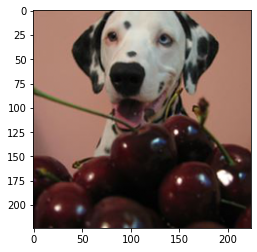

In [ ]:
plt.imshow(test_img[0])
plt.show()

In [ ]:
# Test image를 model에 넣고 예측값 뽑기
model.eval()
test_img_tensor = torch.tensor(test_img, dtype=torch.float)
test_img_tensor = test_img_tensor.permute((0,3,1,2))
test_img_tensor = test_img_tensor.to(device)

out = model(test_img_tensor)

In [ ]:
prediction = out.to(torch.device('cpu')).detach().numpy()
prediction.shape

(1, 1000)

In [ ]:
# 예측확률 순서로 class sorting 하기
pred_classes = np.argsort(prediction, -1)
pred_classes = pred_classes[0, ::-1]
pred_classes[0]

251

In [ ]:
# imagenet class 목록 읽기
imagenet_classes = np.loadtxt('/gdrive/MyDrive/woorifis_prepare/data/imagenet_classes.txt', delimiter='\n', dtype=str)

In [ ]:
# 예측한 top-5 class 이름 확인
for pred_class in pred_classes[:5]:
  print(pred_class, imagenet_classes[pred_class])

251 dalmatian, coach dog, carriage dog
208 Labrador retriever
164 bluetick
719 piggy bank, penny bank
209 Chesapeake Bay retriever


In [ ]:
print(model)

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

In [ ]:
model._modules.items()

odict_items([('features', Sequential(
  (0): ConvNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
  )
  (1): InvertedResidual(
    (conv): Sequential(
      (0): ConvNormActivation(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (2): InvertedResidual(
    (conv): Sequential(
      (0): ConvNormActivation(
        (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [ ]:
for layer in list(model._modules.items()):
  print(layer[0])

features
classifier


In [ ]:
class Hook():
  def __init__(self, module):
    self.hook = module.register_forward_hook(self.hook_fn)
  def hook_fn(self, module, input, output):
    self.input = input
    self.output = output

In [ ]:
hookF = [Hook(layer[1]) for layer in list(model._modules.items())]
model(test_img_tensor)
for hook in hookF:
  print(hook.input[0].shape)
  print(hook.output[0].shape)

torch.Size([1, 3, 224, 224])
torch.Size([1280, 7, 7])
torch.Size([1, 1280])
torch.Size([1000])


In [ ]:
feature_map = next(iter(hookF)).output[0]
feature_map.shape

torch.Size([1280, 7, 7])

In [ ]:
weight = model.classifier[1].weight
weight.shape

torch.Size([1000, 1280])

In [ ]:
selected_class = pred_classes[0]
selected_class, imagenet_classes[selected_class]

(251, 'dalmatian, coach dog, carriage dog')

In [ ]:
cam = torch.zeros((feature_map.shape[1], feature_map.shape[2])).to(device)

for idx in range(len(feature_map)):
  cam += feature_map[idx] * weight[selected_class, idx]

normalized_cam = cam.to(torch.device('cpu')).detach().numpy()
normalized_cam = (normalized_cam - np.min(normalized_cam)) / (np.max(normalized_cam) - np.min(normalized_cam))

In [ ]:
import cv2

cam_img = cv2.resize(np.uint8(normalized_cam * 255), dsize=(IMG_SIZE, IMG_SIZE))

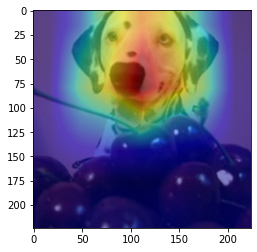

In [ ]:
plt.imshow(test_img[0], cmap='gray')
plt.imshow(cam_img, cmap='jet', alpha=0.5)
plt.show()